In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist


# 1. Implement kmean algorithm by Numpy.

In [2]:

class Kmean:
    def __init__(self, X, K):
        self.X = X
        self.K = K
        self.initial_center = X[np.random.choice(X.shape[0], size = K, replace = False)]
        self.center_hist = [self.initial_center]
        self.label_hist = [self.assign_labels(X, self.initial_center)]
        self.it = None

    def assign_labels(self, X, centers):
        D = cdist(X, centers)
        return np.argmin(D, axis = 1)

    def update_centers(self, labels):
        centers = np.zeros((self.K, self.X.shape[1])) # center (k x n)
        for k in range(self.K):
            Xk = self.X[labels == k, :]
            centers[k, :] = np.mean(Xk, axis = 0)
        return centers

    def check_centers(self, center, new_center):
        return set([tuple(i) for i in center]) == set([tuple(i) for i in tuple(new_center)])

    def get_label_hist(self):
        return self.label_hist
    
    def get_center_hist(self):
        return self.center_hist

    def fit(self, max_iter = 500):
        center = self.initial_center
        self.it = 0
        for _ in range(max_iter):
            label = self.assign_labels(self.X, center)
            new_center = self.update_centers(label)
            if self.check_centers(center, new_center):
                return (center, label, self.it)
            center = new_center
            self.center_hist.append(center)
            self.label_hist.append(label)
            self.it += 1
        return (center, label, self.it)

    def inertia(self, center, label): # 
        result = 0
        for k in range(self.K):
             Xk = self.X[k == label, :]
             for i in range(len(Xk)):
                result += np.square(np.linalg.norm(Xk[i] - center[k]))
        return result

    def plot_solution_hist(self): # plot all iterations
        labels = self.get_label_hist()
        center = self.get_center_hist()
        for i in range(self.it):
            fig, ax = plt.subplots()
            plot_cluster(self.X, label= labels[i], ax = ax, center = center[i])
            ax.set_title(f"iteration {i + 1}")
            ax.tick_params(
            axis='both',          
            which='both',      
            bottom=False,      
            top=False,         
            labelbottom=False, 
            left = False,
            labelleft = False) 
        
def plot_cluster(X, label, center, ax):
    K = np.amax(label) + 1
    color = ["b^", 'go', 'rx', 'mv', 'k+', 'c<']
    for i in range(K):
        X0 = X[label == i, :]
        ax.plot(X0[:, 0], X0[:, 1], color[i], markersize = 4, alpha = .6)
    if center is not None:
        for i in range(K):
            ax.plot(center[i][0], center[i][1], 'y*', markersize = 10, alpha = 1)
    ax.plot()

def plot_elbow(data_x, K):
    fig, ax = plt.subplots()
    x = []
    y = []
    for i in range(1, K + 1):
        test_kmean = Kmean(data_x, i)
        (center_test, label_test, it_test) = test_kmean.fit()
        x.append(i)
        y.append(test_kmean.inertia(center_test, label_test))
    ax.scatter(x = x, y = y)
    ax.plot(x, y)
    ax.set_xlabel("number of clusters (K)")
    ax.set_ylabel("Mean distance between centers and point in cluster")

def plot_silhoutte(data_x, K):
    fig, ax = plt.subplots()
    x = []
    y = []
    for i in range(2, K + 1):
        test_kmean = Kmean(data_x, i)
        (center_test, label_test, it_test) = test_kmean.fit()
        x.append(i)
        y.append(silhouette_score(data_x,  labels =  label_test))
    ax.scatter(x = x, y = y)
    ax.plot(x, y)
    ax.set_xlabel("number of clusters (K)")
    ax.set_ylabel("silhouette_score")  

# 2. Create at least three toy dataset (https://scikit-learn.org/stable/datasets/sample_generators.html), then apply kmean algorithm built in the first question? Try different number of cluster to see how the result change?

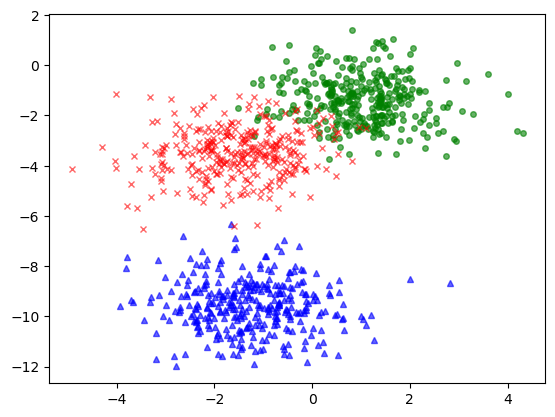

In [3]:
# toy dataset 1:
from sklearn.datasets import make_blobs
x_train, y_train = make_blobs(n_samples = 1000, centers = 3, random_state= 2)
fig, ax = plt.subplots()
plot_cluster(x_train, label=y_train, center = None, ax = ax)

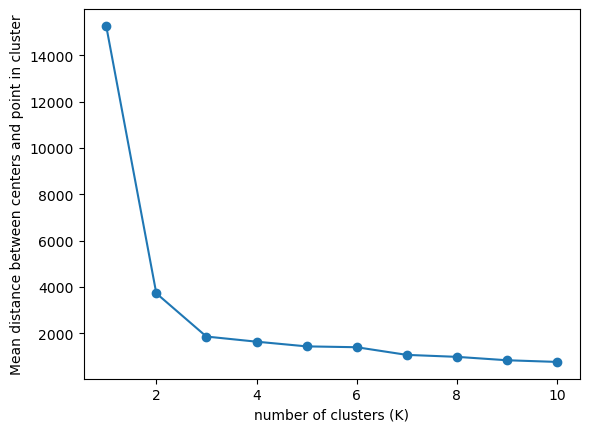

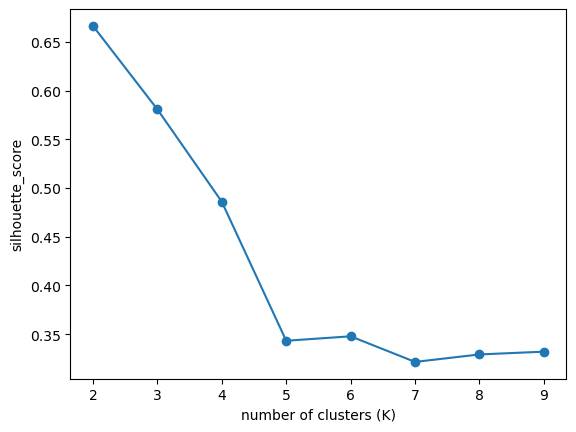

In [4]:
plot_elbow(x_train, 10)
plot_silhoutte(x_train, 9)

In [5]:
solution = Kmean(x_train, 3)
(center, label, it) = solution.fit()

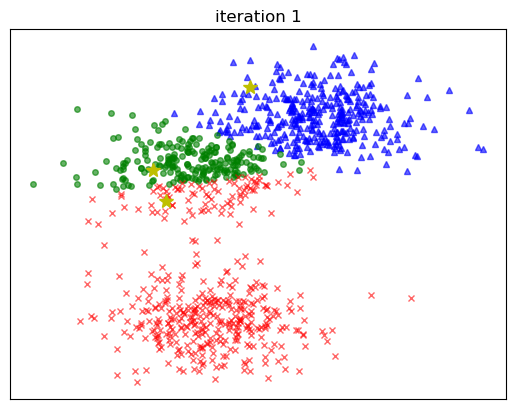

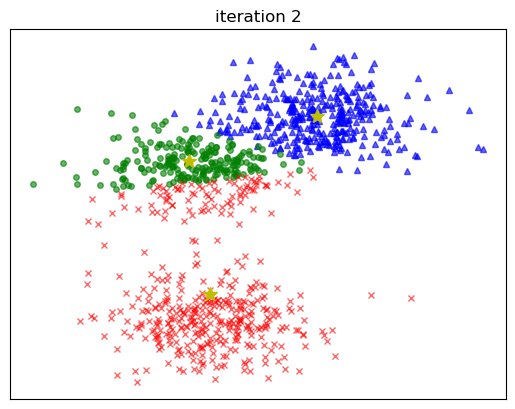

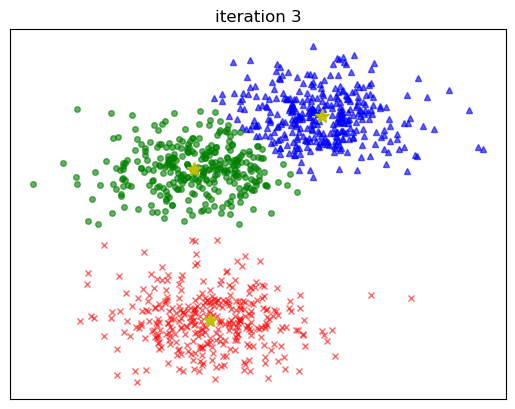

In [6]:

solution.plot_solution_hist()

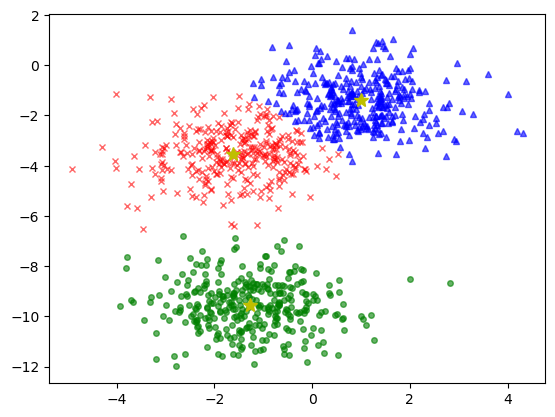

In [7]:
fig, ax = plt.subplots()
solution = Kmean(x_train, 3)
(center, label, it) = solution.fit()
plot_cluster(x_train, label=label, center = center, ax = ax)

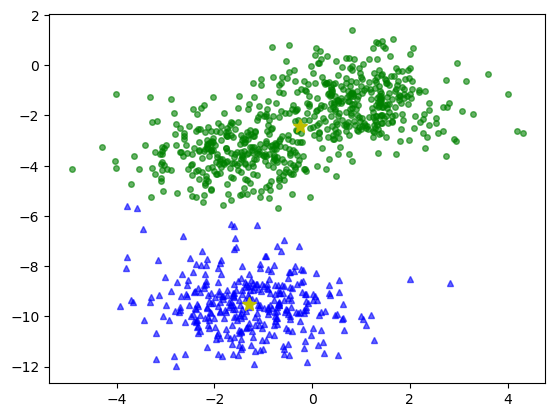

In [8]:
fig, ax = plt.subplots()
solution = Kmean(x_train, 2)
(center, label, it) = solution.fit()
plot_cluster(x_train, label=label, center = center, ax = ax)

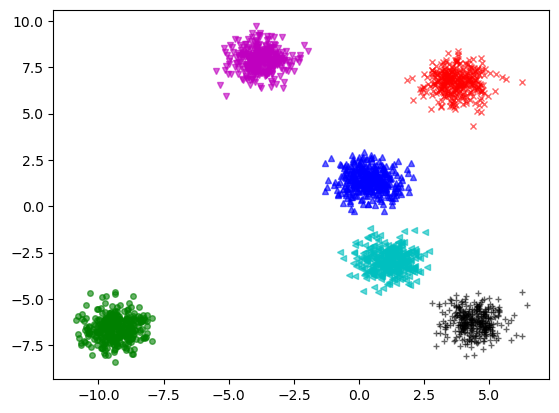

In [9]:
# toy dataset 2:
x_train2, y_train2 = make_blobs(n_samples=2000, n_features=2, centers=6, random_state= 101, cluster_std=0.6)
fig, ax = plt.subplots()
plot_cluster(x_train2, label=y_train2, center = None, ax = ax)

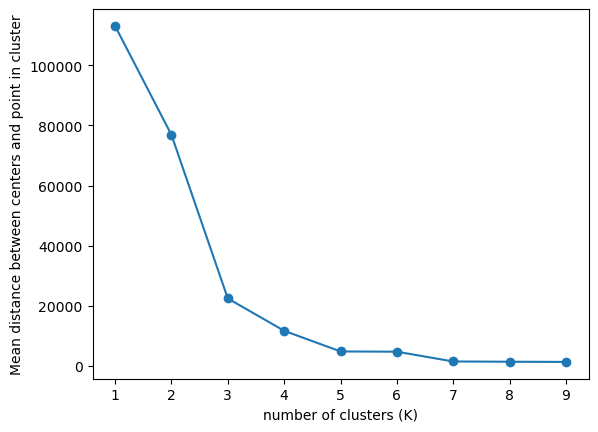

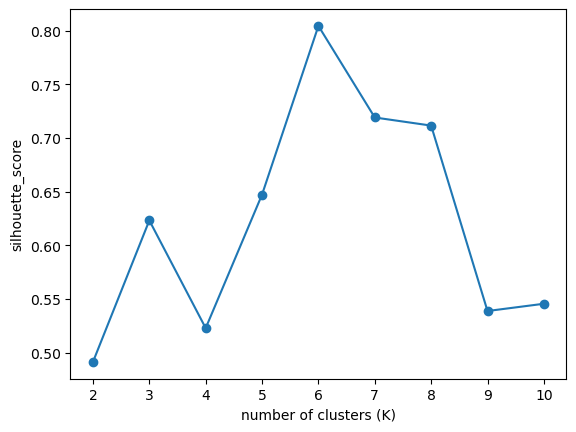

In [10]:
plot_elbow(x_train2, 9)
plot_silhoutte(x_train2, 10)

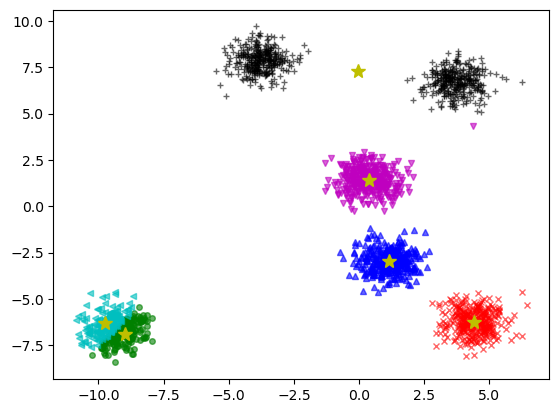

In [11]:
fig, ax = plt.subplots()
solution2 = Kmean(x_train2, 6)
(center_2, label_2, it_2) = solution2.fit()
plot_cluster(x_train2, label_2, center_2, ax)

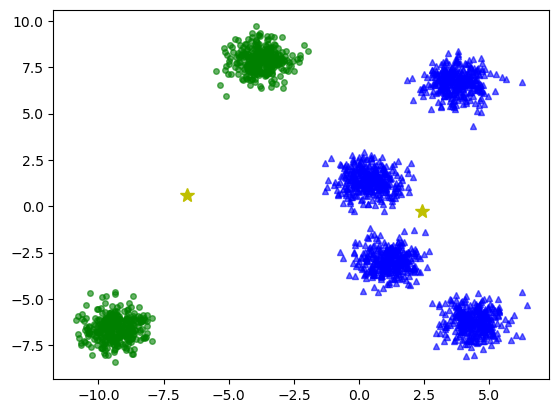

In [12]:
fig, ax = plt.subplots()
solution2 = Kmean(x_train2, 2)
(center_2, label_2, it_2) = solution2.fit()
plot_cluster(x_train2, label_2, center_2, ax)

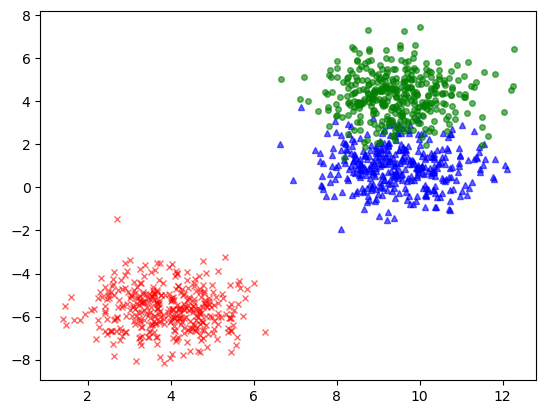

In [13]:
# toy dataset 3
fig, ax = plt.subplots()
x_train3, y_train3 = make_blobs(n_samples=1090, n_features=2, centers=3, random_state= 4)
plot_cluster(x_train3, label=y_train3, center = None, ax = ax)

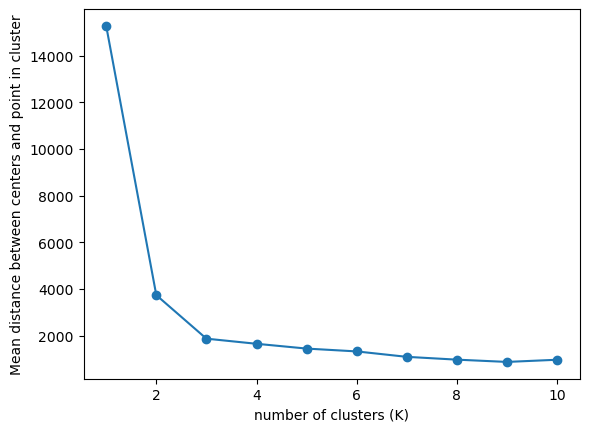

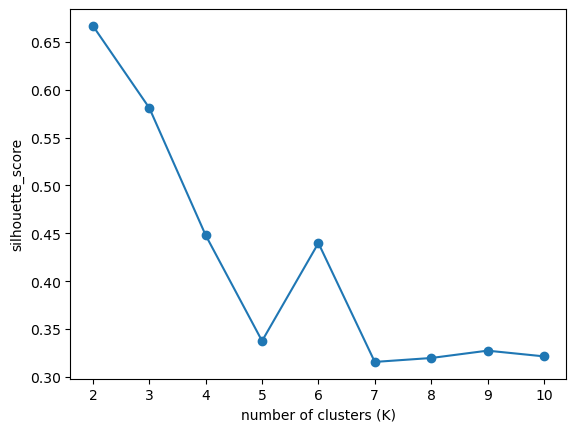

In [14]:
plot_elbow(x_train, K = 10)
plot_silhoutte(x_train, K = 10)

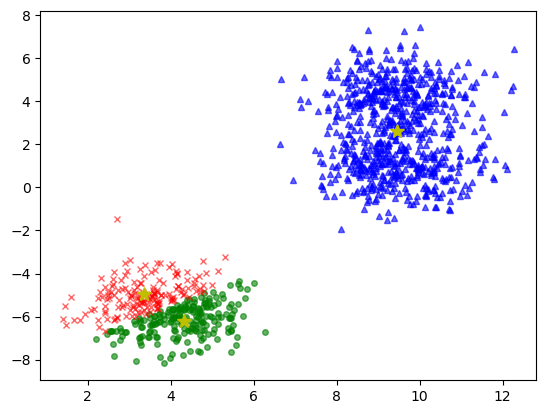

In [15]:
fig, ax = plt.subplots()
solution3 = Kmean(x_train3, 3)
(center_3_1, label_3_1, it_3_1) = solution3.fit()
plot_cluster(x_train3, label_3_1, center_3_1, ax)

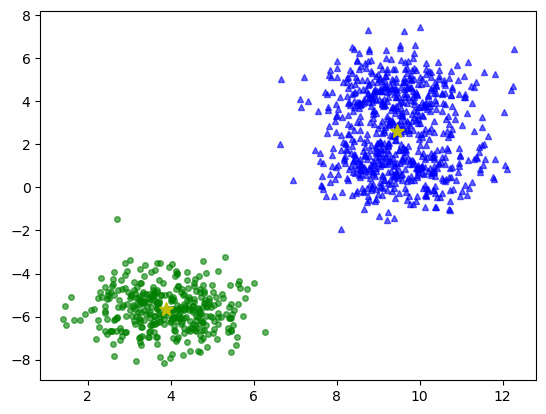

In [16]:
fig, ax = plt.subplots()
solution3 = Kmean(x_train3, 2)
(center_3_2, label_3_2, it_3) = solution3.fit()
plot_cluster(x_train3, label_3_2, center_3_2, ax)

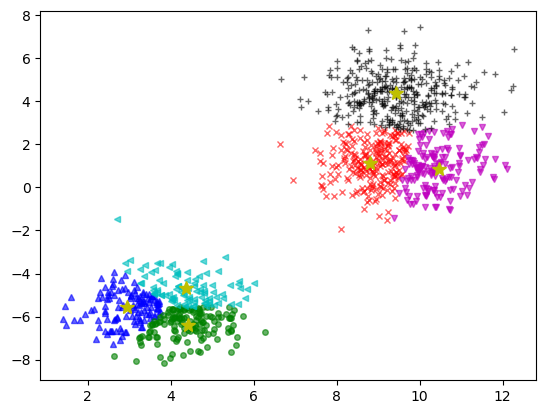

In [17]:
fig, ax = plt.subplots()
solution3 = Kmean(x_train3, 6)
(center_3_3, label_3_3, it_3) = solution3.fit()
plot_cluster(x_train3, label_3_3, center_3_3, ax)

## When fit the model with appropriate number of clusters, the data is divided into suitable groups. When there are too many clusters, smaller clusters are placed within one larger cluster. On contrary, when there are too few clusters, some disjoint groups are fit into one larger group.

In [18]:
x_train3_outlier = np.vstack((x_train3, [900, 0]))
solution_outlier = Kmean(x_train3_outlier, 3)
(center, label, it) = solution_outlier.fit()

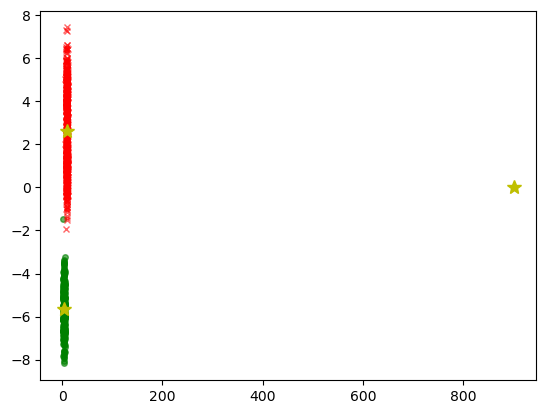

In [19]:
fig, ax = plt.subplots()
plot_cluster(x_train3_outlier, label, center, ax)